# MasterCamp_TD_Project

### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sns

### Importation des données

In [2]:
# Chargement des données
df = 'data/valeursfoncieres-2023.txt'

# Lecture du fichier par échantillons de 10 000 lignes
df_chunks = pd.read_csv(df, sep='|', chunksize=10000, decimal=',')

# Concaténation des échantillons
df = pd.concat(df_chunks)

# Affichage des 5 premières lignes
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,1,2.0,Appartement,NaN,233.0,8.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2023,Vente,...,NaN,0,1.0,Maison,NaN,64.0,3.0,S,NaN,988.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2023,Vente,...,NaN,0,1.0,Maison,NaN,73.0,3.0,S,NaN,835.0


In [3]:
# On garde les colonnes qui nous intéressent : 

# show les noms des colonnes :
df.columns
"""Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')"""

# On garde les colonnes qui nous intéressent : "No disposition", "Date mutation", "Nature mutation", "Valeur fonciere", "Code departement", "Code commune", "Prefixe de section", "Section", "No plan", "Code type local", "Surface reelle bati", "Surface terrain"
df = df[["No disposition", "Date mutation", "Nature mutation", "Valeur fonciere", "Code departement", "Code commune", "Prefixe de section", "Section", "No plan", "Code type local", "Surface reelle bati", "Surface terrain", "Nombre pieces principales", "Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot"]]
df.tail()


,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Surface terrain,Nombre pieces principales,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot
3727000,1,05/10/2023,Adjudication,3931000.0,75,107,NaN,BU,4,3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3727001,1,05/10/2023,Adjudication,3931000.0,75,107,NaN,BU,4,3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3727002,1,05/10/2023,Adjudication,3931000.0,75,107,NaN,BU,4,3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3727003,1,28/12/2023,Vente,98250.0,75,115,NaN,FV,100,3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3727004,1,28/12/2023,Vente,98250.0,75,115,NaN,FV,100,2.0,18.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Algo de clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
# Conversion des autres colonnes en types numériques, avec gestion des NaN
cols_to_convert = ['Surface reelle bati', 'Surface terrain', 'Nombre pieces principales', 
                   'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 
                   'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 
                   'Surface Carrez du 5eme lot']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
df.dtypes

No disposition                  int64
Date mutation                  object
Nature mutation                object
Valeur fonciere               float64
Code departement               object
Code commune                    int64
Prefixe de section            float64
Section                        object
No plan                         int64
Code type local               float64
Surface reelle bati           float64
Surface terrain               float64
Nombre pieces principales     float64
Surface Carrez du 1er lot     float64
Surface Carrez du 2eme lot    float64
Surface Carrez du 3eme lot    float64
Surface Carrez du 4eme lot    float64
Surface Carrez du 5eme lot    float64
dtype: object

In [12]:
# On remplace les NaN par 0
df.fillna(0, inplace=True)

# On crée une colonne "Surface totale" qui est la somme des surfaces des lots
df['Surface totale'] = df['Surface reelle bati'] + df['Surface terrain'] + df['Surface Carrez du 1er lot'] + df['Surface Carrez du 2eme lot'] + df['Surface Carrez du 3eme lot'] + df['Surface Carrez du 4eme lot'] + df['Surface Carrez du 5eme lot']

# On crée une colonne "Prix au m2" qui est le rapport entre la valeur foncière et la surface totale
df['Prix au m2'] = df['Valeur fonciere'] / df['Surface reelle bati']


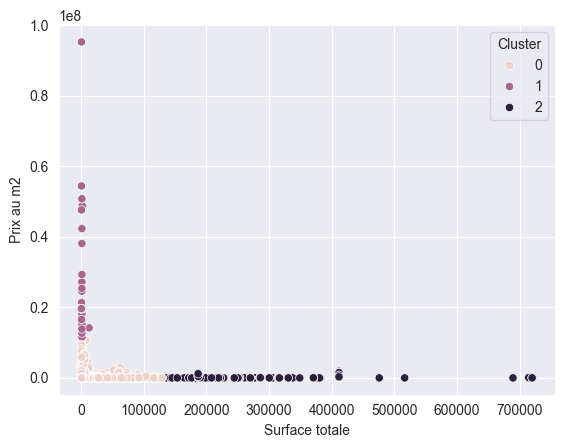

In [13]:
# algo de clustering KMeans
X = df[['Surface totale', 'Prix au m2']]  # On ne garde que les colonnes qui nous intéressent
scaler = StandardScaler()  # On standardise les données
X_scaled = scaler.fit_transform(X)  # On applique la standardisation
kmeans = KMeans(n_clusters=3)  # On crée le modèle (3 clusters)
kmeans.fit(X_scaled)  # On entraîne le modèle
df['Cluster'] = kmeans.predict(X_scaled)  # On prédit les clusters

# Affichage des clusters
sns.scatterplot(data=df, x='Surface totale', y='Prix au m2', hue='Cluster')
plt.show()

In [14]:
# On crée un dataframe par cluster
df_cluster_0 = df[df['Cluster'] == 0]
df_cluster_1 = df[df['Cluster'] == 1]
df_cluster_2 = df[df['Cluster'] == 2]

# On affiche les statistiques des clusters
print('Cluster 0')
print(df_cluster_0.describe())
print('Cluster 1')
print(df_cluster_1.describe())
print('Cluster 2')
print(df_cluster_2.describe())


Cluster 0
       No disposition  Valeur fonciere  Code commune  Prefixe de section  \
count    1.184997e+06     1.184997e+06  1.184997e+06        1.184997e+06   
mean     1.030759e+00     7.006506e+05  2.053215e+02        2.348999e+01   
std      2.377463e-01     5.672853e+06  1.698491e+02        1.287578e+02   
min      1.000000e+00     1.500000e-01  1.000000e+00        0.000000e+00   
25%      1.000000e+00     1.200000e+05  7.100000e+01        0.000000e+00   
50%      1.000000e+00     2.000000e+05  1.640000e+02        0.000000e+00   
75%      1.000000e+00     3.460000e+05  2.940000e+02        0.000000e+00   
max      3.700000e+01     7.620000e+08  9.090000e+02        9.500000e+02   

            No plan  Code type local  Surface reelle bati  Surface terrain  \
count  1.184997e+06     1.184997e+06         1.184997e+06     1.184997e+06   
mean   3.675482e+02     1.687241e+00         1.133933e+02     9.431844e+02   
std    5.362391e+02     8.709273e-01         6.023574e+02     2.864790e

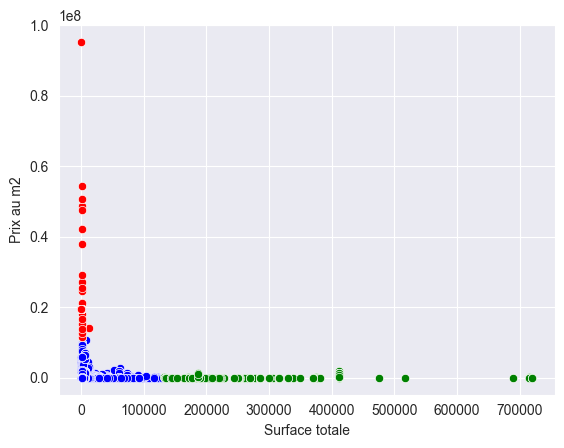

In [15]:
# On affiche les clusters
sns.scatterplot(data=df_cluster_0, x='Surface totale', y='Prix au m2', color='blue')
sns.scatterplot(data=df_cluster_1, x='Surface totale', y='Prix au m2', color='red')
sns.scatterplot(data=df_cluster_2, x='Surface totale', y='Prix au m2', color='green')
plt.show()
